In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pynapple as nap
from spatial_manifolds.toroidal import *
from spatial_manifolds.behaviour_plots import *
from matplotlib.colors import TwoSlopeNorm
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import umap
from cebra import CEBRA
import cebra.integrations.plotly
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from spatial_manifolds.mlencoding import *
from spatial_manifolds.circular_decoder import circular_decoder, cross_validate_decoder, cross_validate_decoder_time, circular_nanmean
from spatial_manifolds.data.curation import curate_clusters
from scipy.stats import zscore
from spatial_manifolds.util import gaussian_filter_nan
from spatial_manifolds.predictive_grid import compute_travel_projected, wrap_list
from spatial_manifolds.behaviour_plots import *
from spatial_manifolds.behaviour_plots import trial_cat_priority
from spatial_manifolds.detect_grids import *
from spatial_manifolds.brainrender_helper import *

import numpy as np
import matplotlib.pyplot as plt
import hdbscan
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
fig_path = '/Users/harryclark/Documents/figs/FIGURE1/'
mouse = 29
day = 23

# good examples include 
#mice = [25, 25, 26, 27, 29, 28]
#days = [25, 24, 18, 26, 23, 25]

last_ephys_bin 14700
last_ephys_time_bin 1924.675
29 23
there are 211 cells to begin with
I wont use these brain regions
['FL', 'PFL', 'SIM', 'arb', 'root']
there are 143 non_grid and non_spatial_cells
there are 36 grid_cells
there are 126 non grid spatial cells
there are 17 non spatial cells
there are 32 speed cells
there are 211 cells
for mi0, there are 27 points
for mi1, there are 9 points


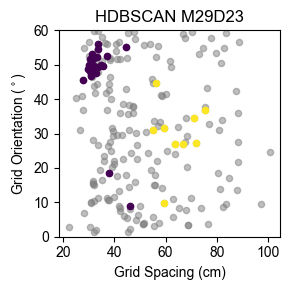

for module 0, there are 27 cells with average spacing 33.226706507570576
for module 1, there are 9 cells with average spacing 64.2892923988678
last_ephys_bin 14700
last_ephys_time_bin 1924.675
module 0 contains cells from ['ENTm2' 'ENTm3' 'ENTm5']
module 1 contains cells from ['ENTm1' 'ENTm2' 'ENTm3' 'ENTm5']
29 23
for module 0, there are 14 cells
for module 1, there are 6 cells
last_ephys_bin 14700
last_ephys_time_bin 1924.675


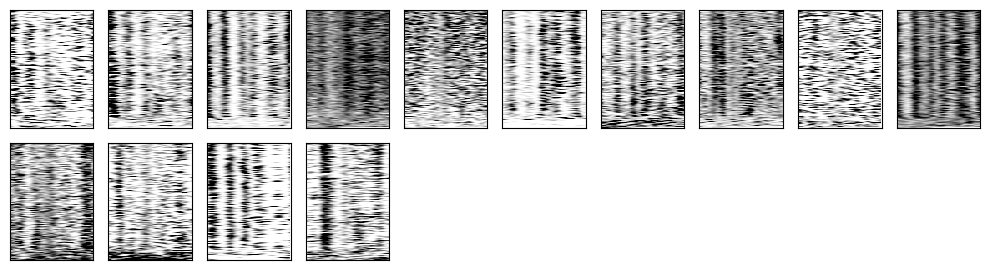

last_ephys_bin 14700
last_ephys_time_bin 1924.675


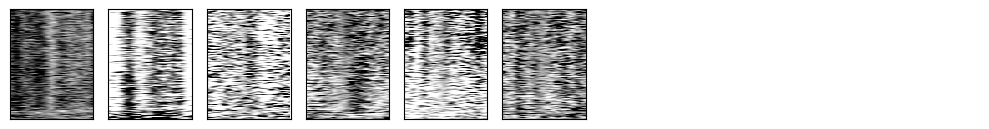

last_ephys_bin 14700
last_ephys_time_bin 1924.675


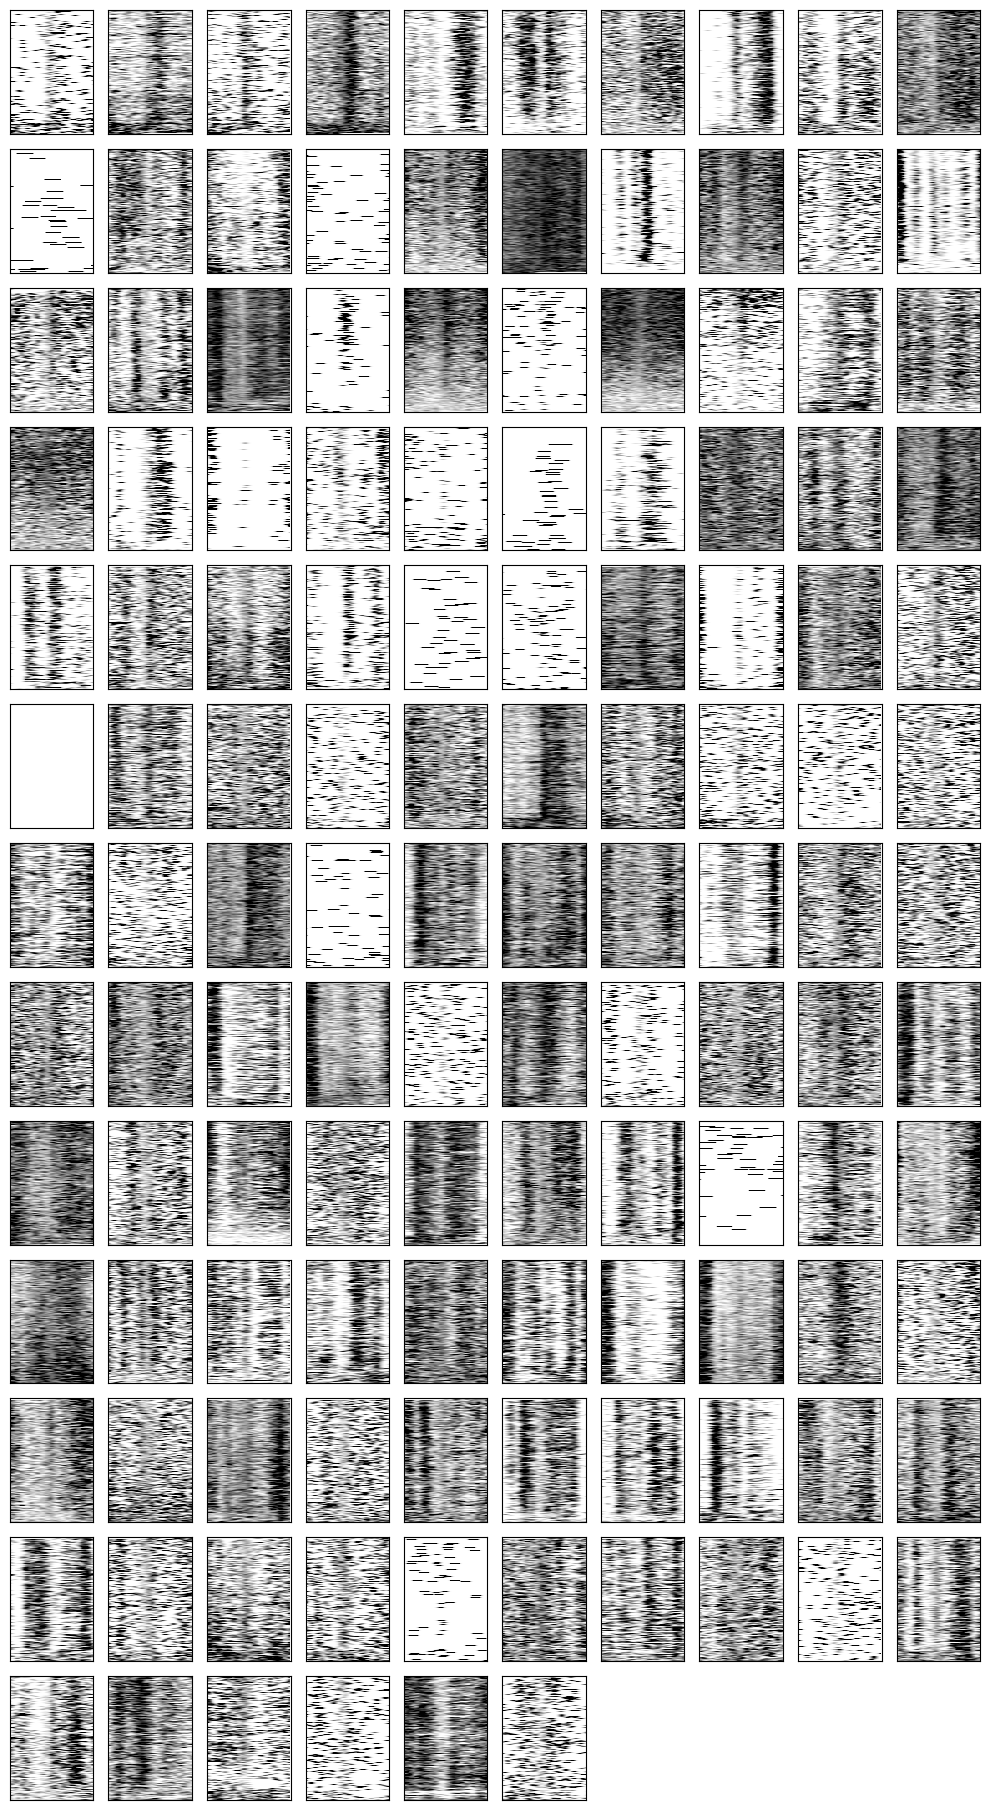

last_ephys_bin 14700
last_ephys_time_bin 1924.675


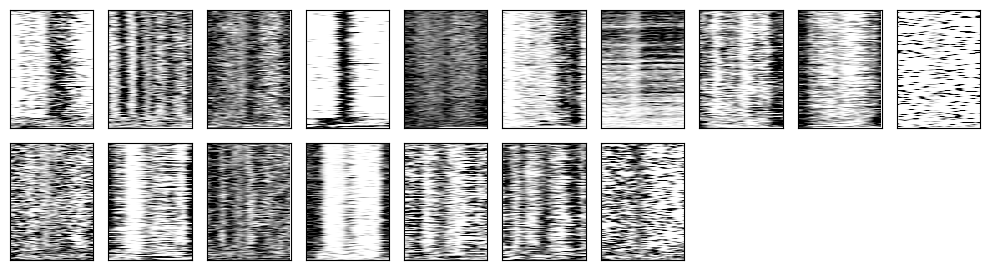

last_ephys_bin 14700
last_ephys_time_bin 1924.675


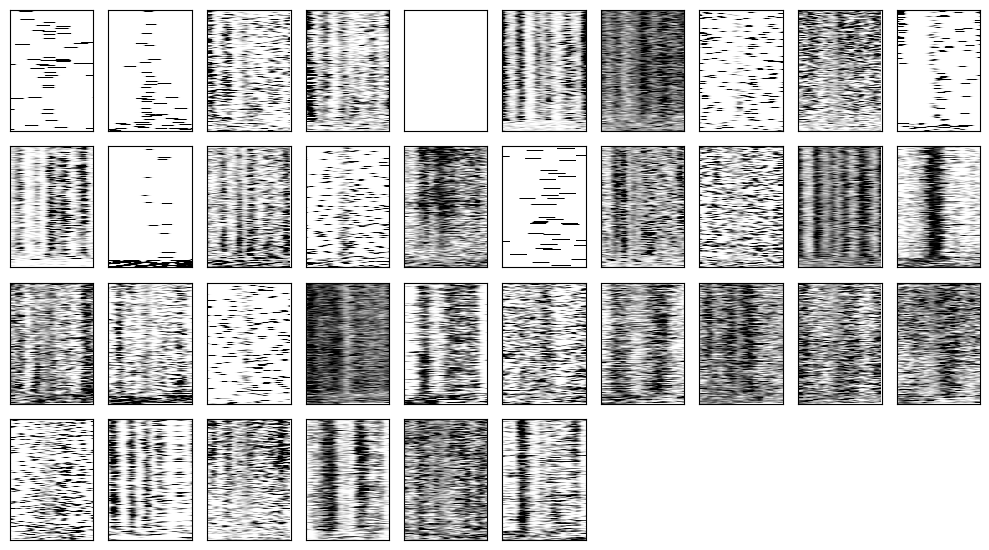

last_ephys_bin 14700
last_ephys_time_bin 1924.675


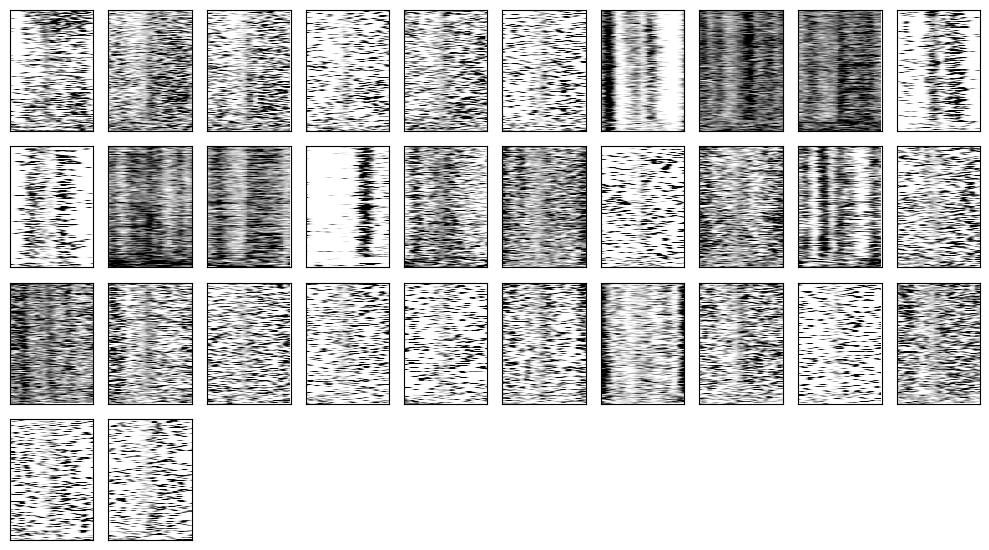

In [3]:
gcs, ngs, ns, sc, ngs_ns, all = cell_classification_of1(mouse, day, percentile_threshold=99) # subset
rc, rsc, vr_ns = cell_classification_vr(mouse, day)

g_m_ids, g_m_cluster_ids = HDBSCAN_grid_modules(gcs, all, mouse, day, min_cluster_size=3, cluster_selection_epsilon=3, 
                                                figpath=fig_path, curate_with_vr=True, curate_with_brain_region=True) # create grid modules using HDBSCAN    

plot_grid_modules_rate_maps(gcs, g_m_ids, g_m_cluster_ids, mouse, day, figpath=fig_path)

# we now have cluster ids classified into modules, non grid spatial cells and non spatial cells 
# as defined by activity in the open field
g_m_cluster_ids = sorted(g_m_cluster_ids, key=len, reverse=True) 
cluster_ids_by_group = []
cluster_ids_by_group.extend(g_m_cluster_ids) # grid cells by module [0,1,2...]
cluster_ids_by_group.append(ngs.cluster_id.values.tolist()) # non grid spatial [-4]
cluster_ids_by_group.append(ns.cluster_id.values.tolist()) # non spatial cells [-3]
cluster_ids_by_group.append(gcs.cluster_id.values.tolist()) # all grid cells [-2]
cluster_ids_by_group.append(sc.cluster_id.values.tolist()) # speed cells [-1]

for m, cluster_ids in enumerate(cluster_ids_by_group):
    plot_vr_rate_maps(mouse, day, cluster_ids, label=f'{m}', figpath=fig_path)

#plot_vr_rate_maps(mouse, day, rc.cluster_id.values, label=f'ramp_cells', figpath=fig_path)
#plot_vr_rate_maps(mouse, day, rsc.cluster_id.values, label=f'speed_ramp_cells', figpath=fig_path)

last_ephys_bin 14700
last_ephys_time_bin 1924.675


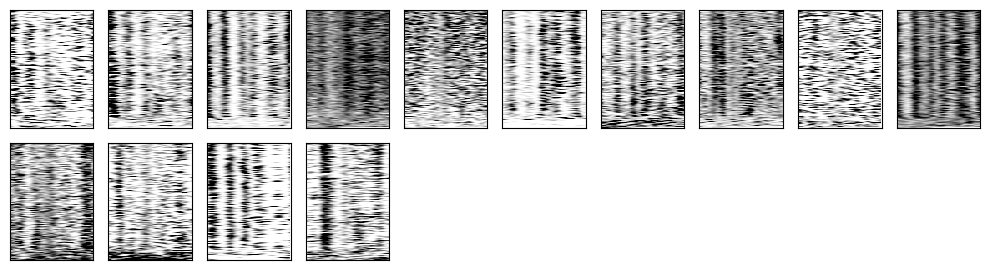

In [4]:
cluster_ids=cluster_ids_by_group[0]
tcs,tcs_time,_,_,_,_ = compute_vr_tcs(mouse, day)
ncols = 10
nrows = int(np.ceil(len(cluster_ids)/ncols))
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 1.4*nrows), squeeze=False)
counter = 0
for j in range(nrows):
    for i in range(ncols):
        if counter<len(cluster_ids):
            index = cluster_ids[counter]
            plot_firing_rate_map(ax[j, i], 
                                zscore(tcs[index]),
                                bs=bs,
                                tl=tl,
                                p=95)
        else:
            ax[j, i].axis('off')
        counter+=1
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
        ax[j, i].xaxis.set_tick_params(labelbottom=False)
        ax[j, i].yaxis.set_tick_params(labelleft=False)
plt.tight_layout()
plt.show()

24, x=-2760.0, y=2865.0, probe_x=0.0, probe_y=1140.0


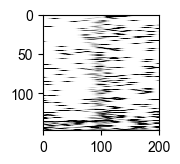

26, x=-2760.0, y=2835.0, probe_x=32.0, probe_y=1170.0


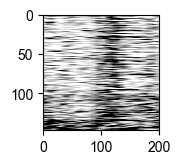

28, x=-2760.0, y=2835.0, probe_x=0.0, probe_y=1170.0


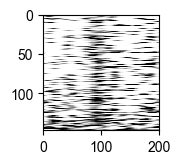

53, x=-3000.0, y=3128.0, probe_x=250.0, probe_y=885.0


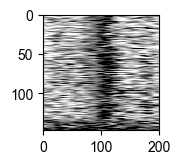

61, x=-3000.0, y=3068.0, probe_x=250.0, probe_y=945.0


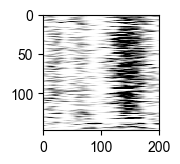

65, x=-3000.0, y=3098.0, probe_x=282.0, probe_y=915.0


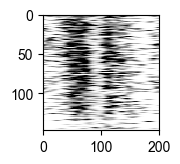

79, x=-3000.0, y=3023.0, probe_x=250.0, probe_y=990.0


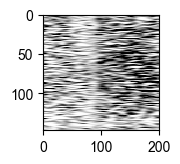

81, x=-3000.0, y=3008.0, probe_x=282.0, probe_y=1005.0


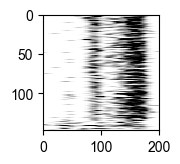

84, x=-3000.0, y=2978.0, probe_x=282.0, probe_y=1035.0


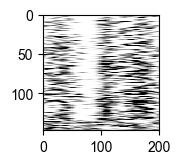

86, x=-3000.0, y=2993.0, probe_x=250.0, probe_y=1020.0


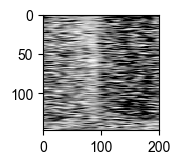

87, x=-3000.0, y=2993.0, probe_x=250.0, probe_y=1020.0


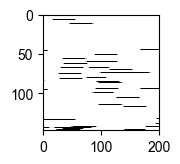

89, x=-3000.0, y=2978.0, probe_x=250.0, probe_y=1035.0


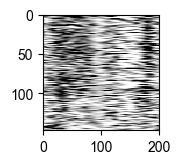

95, x=-3000.0, y=2948.0, probe_x=282.0, probe_y=1065.0


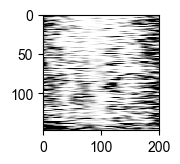

103, x=-3000.0, y=2933.0, probe_x=282.0, probe_y=1080.0


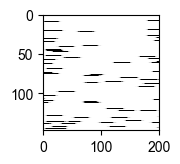

104, x=-3000.0, y=2918.0, probe_x=250.0, probe_y=1095.0


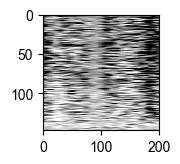

108, x=-3000.0, y=2888.0, probe_x=282.0, probe_y=1125.0


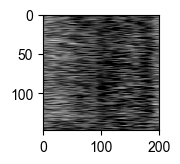

144, x=-3270.0, y=3179.0, probe_x=532.0, probe_y=825.0


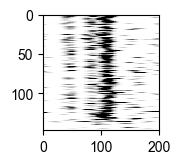

157, x=-3270.0, y=3059.0, probe_x=500.0, probe_y=945.0


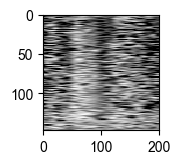

171, x=-3270.0, y=3014.0, probe_x=532.0, probe_y=990.0


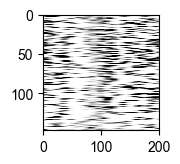

186, x=-3270.0, y=2969.0, probe_x=532.0, probe_y=1035.0


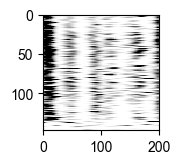

203, x=-3270.0, y=2864.0, probe_x=500.0, probe_y=1140.0


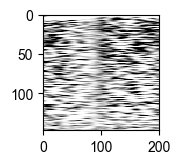

205, x=-3270.0, y=2864.0, probe_x=532.0, probe_y=1140.0


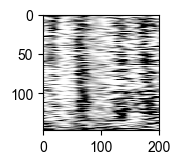

211, x=-3270.0, y=2849.0, probe_x=500.0, probe_y=1155.0


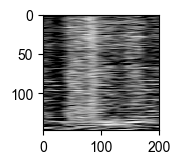

215, x=-3270.0, y=2804.0, probe_x=532.0, probe_y=1200.0


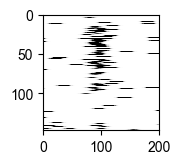

221, x=-3270.0, y=2774.0, probe_x=500.0, probe_y=1230.0


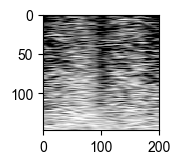

224, x=-3270.0, y=2789.0, probe_x=500.0, probe_y=1215.0


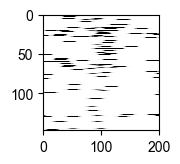

231, x=-3270.0, y=2714.0, probe_x=500.0, probe_y=1290.0


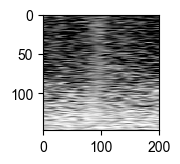

238, x=-3270.0, y=2624.0, probe_x=532.0, probe_y=1380.0


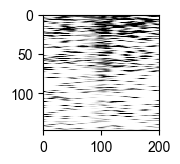

239, x=-3270.0, y=2624.0, probe_x=532.0, probe_y=1380.0


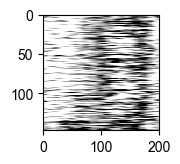

241, x=-3270.0, y=2624.0, probe_x=532.0, probe_y=1380.0


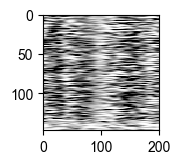

247, x=-3270.0, y=2594.0, probe_x=532.0, probe_y=1410.0


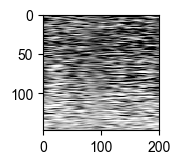

249, x=-3510.0, y=3508.0, probe_x=782.0, probe_y=480.0


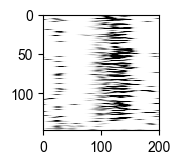

251, x=-3510.0, y=3523.0, probe_x=750.0, probe_y=465.0


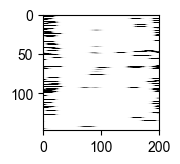

255, x=-3510.0, y=3493.0, probe_x=750.0, probe_y=495.0


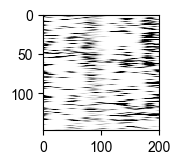

256, x=-3510.0, y=3508.0, probe_x=750.0, probe_y=480.0


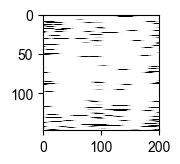

257, x=-3510.0, y=3523.0, probe_x=782.0, probe_y=465.0


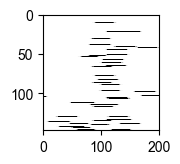

259, x=-3510.0, y=3523.0, probe_x=782.0, probe_y=465.0


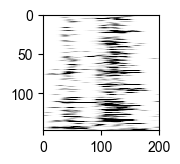

266, x=-3510.0, y=3493.0, probe_x=782.0, probe_y=495.0


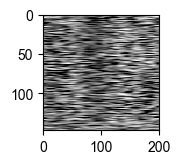

267, x=-3510.0, y=3448.0, probe_x=782.0, probe_y=540.0


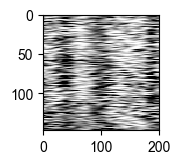

268, x=-3510.0, y=3463.0, probe_x=782.0, probe_y=525.0


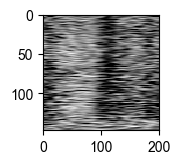

269, x=-3510.0, y=3448.0, probe_x=782.0, probe_y=540.0


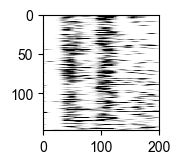

270, x=-3510.0, y=3448.0, probe_x=750.0, probe_y=540.0


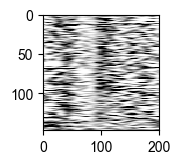

278, x=-3510.0, y=3433.0, probe_x=782.0, probe_y=555.0


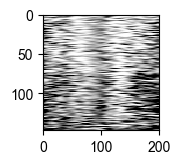

284, x=-3510.0, y=3388.0, probe_x=782.0, probe_y=600.0


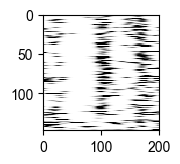

287, x=-3510.0, y=3403.0, probe_x=750.0, probe_y=585.0


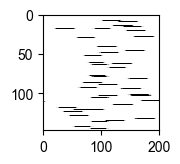

291, x=-3510.0, y=3403.0, probe_x=750.0, probe_y=585.0


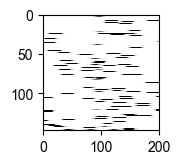

292, x=-3510.0, y=3403.0, probe_x=782.0, probe_y=585.0


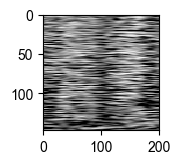

296, x=-3510.0, y=3359.0, probe_x=750.0, probe_y=630.0


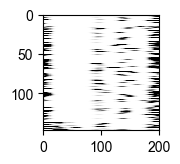

301, x=-3510.0, y=3359.0, probe_x=782.0, probe_y=630.0


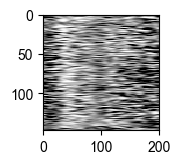

302, x=-3510.0, y=3329.0, probe_x=782.0, probe_y=660.0


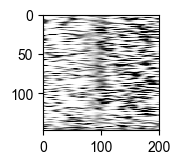

303, x=-3510.0, y=3329.0, probe_x=750.0, probe_y=660.0


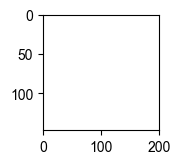

311, x=-3510.0, y=3329.0, probe_x=750.0, probe_y=660.0


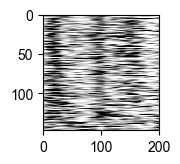

312, x=-3510.0, y=3329.0, probe_x=782.0, probe_y=660.0


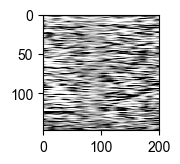

314, x=-3510.0, y=3299.0, probe_x=782.0, probe_y=690.0


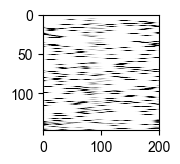

315, x=-3510.0, y=3314.0, probe_x=782.0, probe_y=675.0


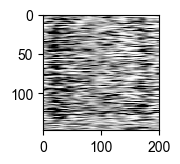

319, x=-3510.0, y=3314.0, probe_x=782.0, probe_y=675.0


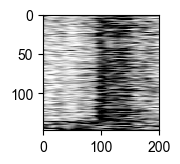

321, x=-3510.0, y=3299.0, probe_x=782.0, probe_y=690.0


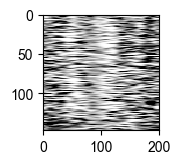

323, x=-3510.0, y=3314.0, probe_x=750.0, probe_y=675.0


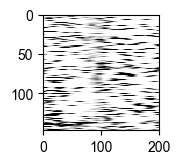

326, x=-3510.0, y=3269.0, probe_x=782.0, probe_y=720.0


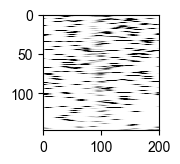

327, x=-3510.0, y=3269.0, probe_x=782.0, probe_y=720.0


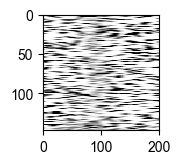

329, x=-3510.0, y=3269.0, probe_x=782.0, probe_y=720.0


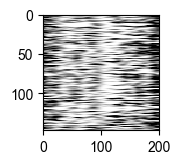

331, x=-3510.0, y=3284.0, probe_x=782.0, probe_y=705.0


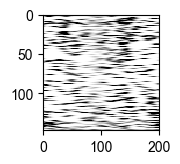

334, x=-3510.0, y=3269.0, probe_x=750.0, probe_y=720.0


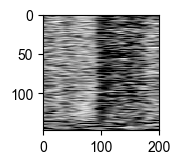

338, x=-3510.0, y=3254.0, probe_x=750.0, probe_y=735.0


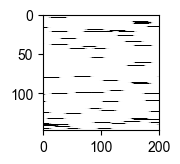

340, x=-3510.0, y=3254.0, probe_x=782.0, probe_y=735.0


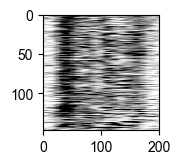

341, x=-3510.0, y=3239.0, probe_x=782.0, probe_y=750.0


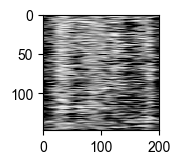

342, x=-3510.0, y=3254.0, probe_x=750.0, probe_y=735.0


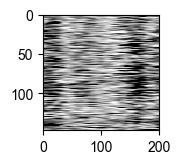

343, x=-3510.0, y=3239.0, probe_x=782.0, probe_y=750.0


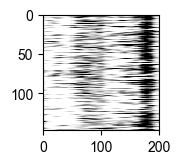

345, x=-3510.0, y=3209.0, probe_x=750.0, probe_y=780.0


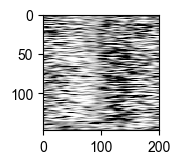

346, x=-3510.0, y=3209.0, probe_x=750.0, probe_y=780.0


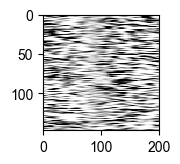

349, x=-3510.0, y=3209.0, probe_x=782.0, probe_y=780.0


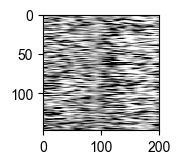

352, x=-3510.0, y=3179.0, probe_x=750.0, probe_y=810.0


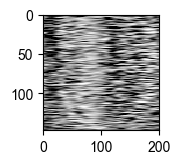

353, x=-3510.0, y=3179.0, probe_x=750.0, probe_y=810.0


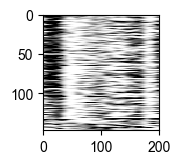

354, x=-3510.0, y=3179.0, probe_x=782.0, probe_y=810.0


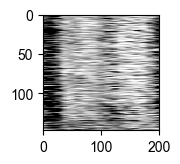

355, x=-3510.0, y=3149.0, probe_x=782.0, probe_y=840.0


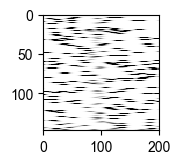

356, x=-3510.0, y=3164.0, probe_x=782.0, probe_y=825.0


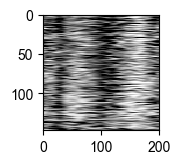

358, x=-3510.0, y=3164.0, probe_x=782.0, probe_y=825.0


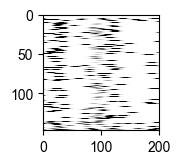

363, x=-3510.0, y=3149.0, probe_x=750.0, probe_y=840.0


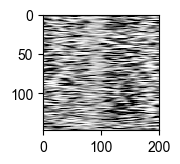

366, x=-3510.0, y=3119.0, probe_x=750.0, probe_y=870.0


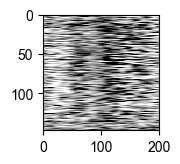

369, x=-3510.0, y=3149.0, probe_x=782.0, probe_y=840.0


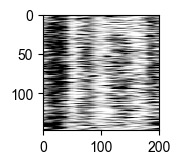

370, x=-3510.0, y=3119.0, probe_x=782.0, probe_y=870.0


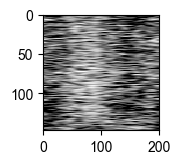

371, x=-3510.0, y=3089.0, probe_x=750.0, probe_y=900.0


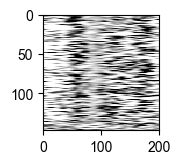

373, x=-3510.0, y=3089.0, probe_x=782.0, probe_y=900.0


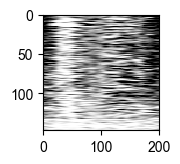

374, x=-3510.0, y=3089.0, probe_x=782.0, probe_y=900.0


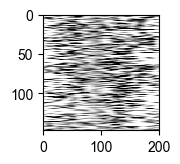

375, x=-3510.0, y=3119.0, probe_x=782.0, probe_y=870.0


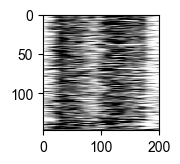

376, x=-3510.0, y=3089.0, probe_x=750.0, probe_y=900.0


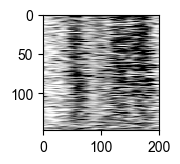

378, x=-3510.0, y=3059.0, probe_x=782.0, probe_y=930.0


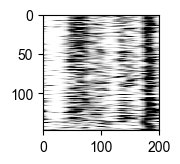

381, x=-3510.0, y=3074.0, probe_x=750.0, probe_y=915.0


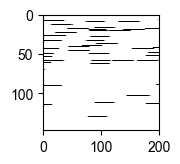

382, x=-3510.0, y=3074.0, probe_x=750.0, probe_y=915.0


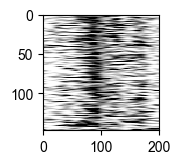

383, x=-3510.0, y=3059.0, probe_x=750.0, probe_y=930.0


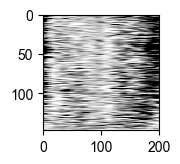

385, x=-3510.0, y=3074.0, probe_x=782.0, probe_y=915.0


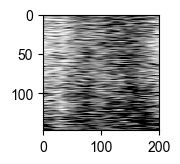

387, x=-3510.0, y=3014.0, probe_x=750.0, probe_y=975.0


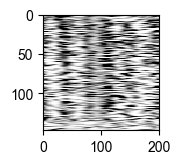

391, x=-3510.0, y=3029.0, probe_x=782.0, probe_y=960.0


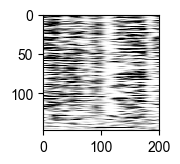

392, x=-3510.0, y=3029.0, probe_x=782.0, probe_y=960.0


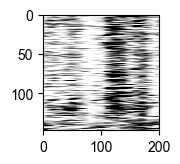

393, x=-3510.0, y=3029.0, probe_x=782.0, probe_y=960.0


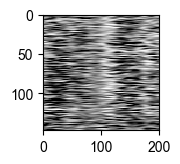

394, x=-3510.0, y=3029.0, probe_x=782.0, probe_y=960.0


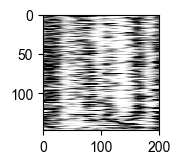

398, x=-3510.0, y=2999.0, probe_x=782.0, probe_y=990.0


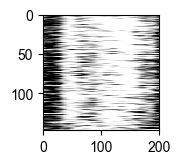

399, x=-3510.0, y=3014.0, probe_x=782.0, probe_y=975.0


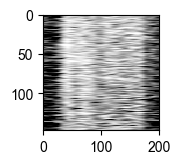

400, x=-3510.0, y=2969.0, probe_x=782.0, probe_y=1020.0


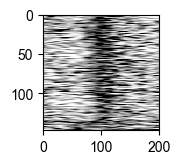

403, x=-3510.0, y=2969.0, probe_x=782.0, probe_y=1020.0


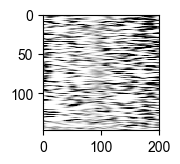

404, x=-3510.0, y=2969.0, probe_x=782.0, probe_y=1020.0


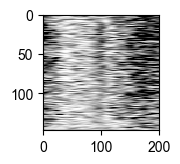

409, x=-3510.0, y=2939.0, probe_x=782.0, probe_y=1050.0


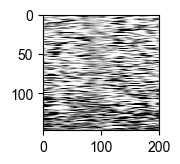

412, x=-3510.0, y=2954.0, probe_x=782.0, probe_y=1035.0


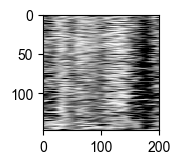

414, x=-3510.0, y=2909.0, probe_x=782.0, probe_y=1080.0


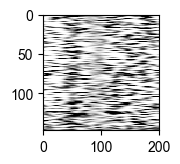

416, x=-3510.0, y=2924.0, probe_x=750.0, probe_y=1065.0


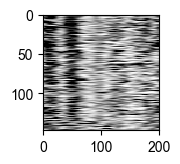

418, x=-3510.0, y=2909.0, probe_x=782.0, probe_y=1080.0


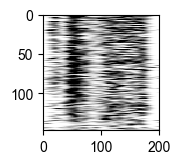

420, x=-3510.0, y=2909.0, probe_x=782.0, probe_y=1080.0


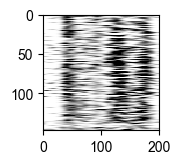

421, x=-3510.0, y=2879.0, probe_x=782.0, probe_y=1110.0


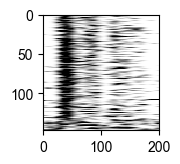

422, x=-3510.0, y=2879.0, probe_x=782.0, probe_y=1110.0


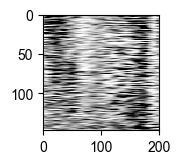

425, x=-3510.0, y=2894.0, probe_x=782.0, probe_y=1095.0


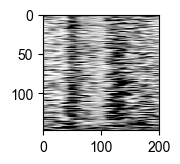

426, x=-3510.0, y=2894.0, probe_x=782.0, probe_y=1095.0


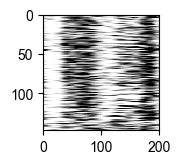

427, x=-3510.0, y=2850.0, probe_x=782.0, probe_y=1140.0


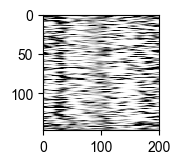

429, x=-3510.0, y=2864.0, probe_x=782.0, probe_y=1125.0


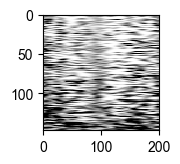

430, x=-3510.0, y=2850.0, probe_x=782.0, probe_y=1140.0


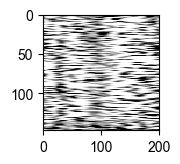

431, x=-3510.0, y=2864.0, probe_x=782.0, probe_y=1125.0


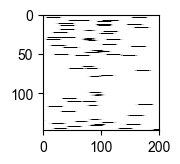

433, x=-3510.0, y=2835.0, probe_x=750.0, probe_y=1155.0


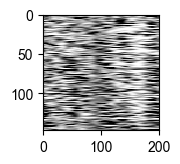

434, x=-3510.0, y=2850.0, probe_x=782.0, probe_y=1140.0


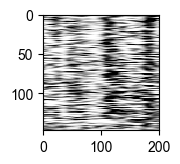

440, x=-3510.0, y=2820.0, probe_x=782.0, probe_y=1170.0


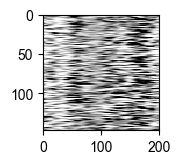

445, x=-3510.0, y=2775.0, probe_x=750.0, probe_y=1215.0


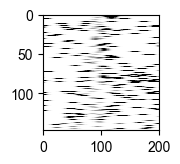

446, x=-3510.0, y=2805.0, probe_x=782.0, probe_y=1185.0


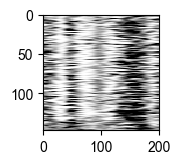

452, x=-3510.0, y=2760.0, probe_x=750.0, probe_y=1230.0


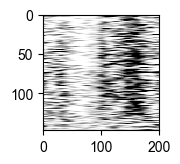

461, x=-3510.0, y=2700.0, probe_x=782.0, probe_y=1290.0


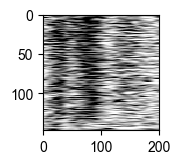

464, x=-3510.0, y=2700.0, probe_x=782.0, probe_y=1290.0


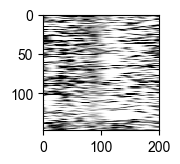

467, x=-3510.0, y=2685.0, probe_x=750.0, probe_y=1305.0


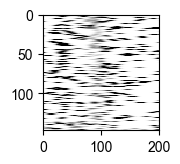

469, x=-3510.0, y=2685.0, probe_x=782.0, probe_y=1305.0


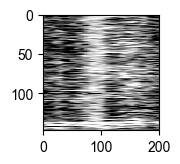

472, x=-3510.0, y=2685.0, probe_x=782.0, probe_y=1305.0


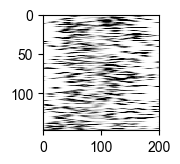


"\n    frequencies, psd = welch(tcs_time[id], fs=int(1000/time_bs))\n    fig, ax = plt.subplots(figsize=(1.5, 
1.5))\n    ax.plot(frequencies[:50], psd[:50]*frequencies[:50])\n    ax.set_xlabel('Frequency (Hz)')\n    
ax.set_ylabel('PSD')\n    plt.show()\n"

In [9]:
from scipy.signal import welch

for id in ngs.cluster_id:
    cluster = all[all.cluster_id == id]
    print(f'{cluster.cluster_id.iloc[0]}, x={np.round(cluster.SC_x.iloc[0])}, y={np.round(cluster.SC_y.iloc[0])}, probe_x={np.round(cluster.probe_x.iloc[0])}, probe_y={np.round(cluster.probe_y.iloc[0])}')
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.5,1.5), squeeze=False)
    plot_firing_rate_map(ax[0,0], zscore(tcs[id]), bs=bs, tl=tl, p=95)
    plt.show()
'''
    frequencies, psd = welch(tcs_time[id], fs=int(1000/time_bs))
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.plot(frequencies[:50], psd[:50]*frequencies[:50])
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('PSD')
    plt.show()
'''


42, x=-3000.0, y=3233.0, probe_x=250.0, probe_y=780.0


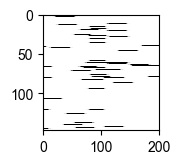

110, x=-3000.0, y=2858.0, probe_x=282.0, probe_y=1155.0


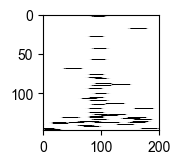

132, x=-3270.0, y=3314.0, probe_x=532.0, probe_y=690.0


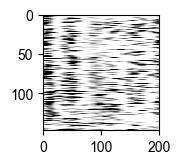

133, x=-3270.0, y=3284.0, probe_x=532.0, probe_y=720.0


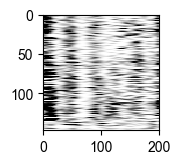

156, x=-3270.0, y=3074.0, probe_x=500.0, probe_y=930.0


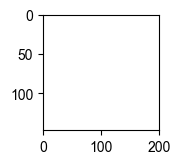

160, x=-3270.0, y=3074.0, probe_x=532.0, probe_y=930.0


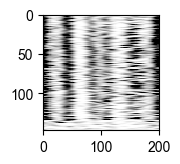

163, x=-3270.0, y=3044.0, probe_x=500.0, probe_y=960.0


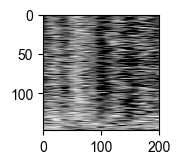

178, x=-3270.0, y=2984.0, probe_x=500.0, probe_y=1020.0


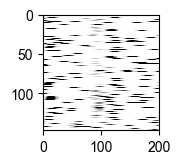

179, x=-3270.0, y=2984.0, probe_x=500.0, probe_y=1020.0


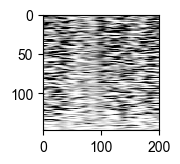

181, x=-3270.0, y=2999.0, probe_x=532.0, probe_y=1005.0


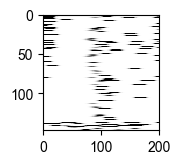

184, x=-3270.0, y=2969.0, probe_x=532.0, probe_y=1035.0


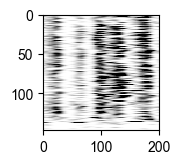

191, x=-3270.0, y=2924.0, probe_x=532.0, probe_y=1080.0


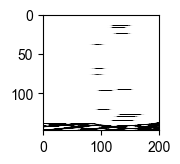

194, x=-3270.0, y=2909.0, probe_x=532.0, probe_y=1095.0


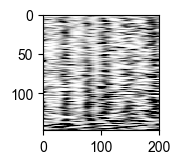

196, x=-3270.0, y=2894.0, probe_x=500.0, probe_y=1110.0


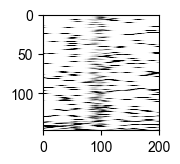

202, x=-3270.0, y=2879.0, probe_x=532.0, probe_y=1125.0


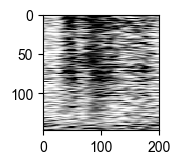

204, x=-3270.0, y=2864.0, probe_x=532.0, probe_y=1140.0


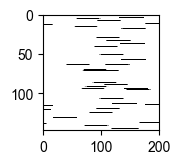

210, x=-3270.0, y=2864.0, probe_x=500.0, probe_y=1140.0


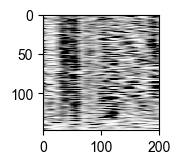

213, x=-3270.0, y=2819.0, probe_x=500.0, probe_y=1185.0


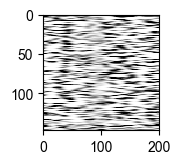

214, x=-3270.0, y=2849.0, probe_x=532.0, probe_y=1155.0


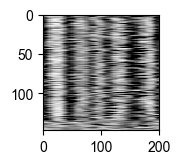

216, x=-3270.0, y=2804.0, probe_x=500.0, probe_y=1200.0


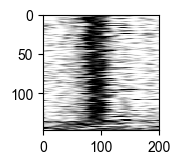

217, x=-3270.0, y=2804.0, probe_x=532.0, probe_y=1200.0


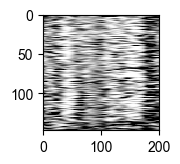

219, x=-3270.0, y=2789.0, probe_x=532.0, probe_y=1215.0


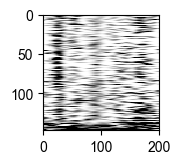

262, x=-3510.0, y=3478.0, probe_x=782.0, probe_y=510.0


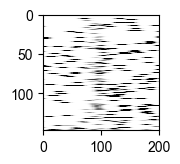

272, x=-3510.0, y=3433.0, probe_x=750.0, probe_y=555.0


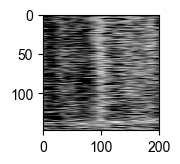

293, x=-3510.0, y=3359.0, probe_x=782.0, probe_y=630.0


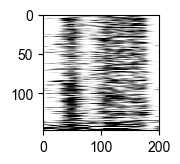

297, x=-3510.0, y=3359.0, probe_x=750.0, probe_y=630.0


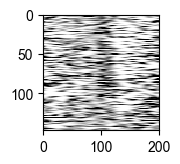

332, x=-3510.0, y=3269.0, probe_x=782.0, probe_y=720.0


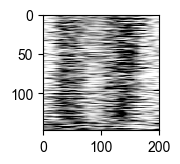

350, x=-3510.0, y=3209.0, probe_x=782.0, probe_y=780.0


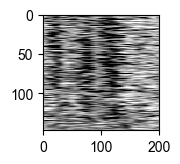

362, x=-3510.0, y=3149.0, probe_x=782.0, probe_y=840.0


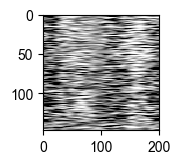

377, x=-3510.0, y=3089.0, probe_x=782.0, probe_y=900.0


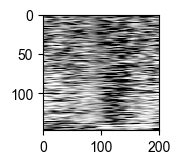

380, x=-3510.0, y=3059.0, probe_x=782.0, probe_y=930.0


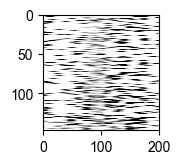

389, x=-3510.0, y=3044.0, probe_x=750.0, probe_y=945.0


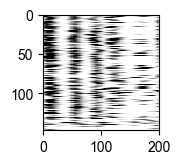

405, x=-3510.0, y=2954.0, probe_x=782.0, probe_y=1035.0


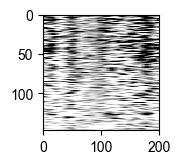

411, x=-3510.0, y=2939.0, probe_x=782.0, probe_y=1050.0


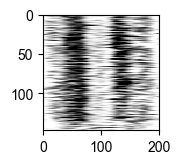

419, x=-3510.0, y=2909.0, probe_x=782.0, probe_y=1080.0


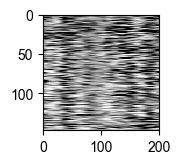

451, x=-3510.0, y=2805.0, probe_x=782.0, probe_y=1185.0


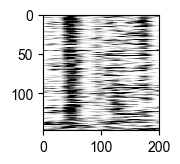


"\n    frequencies, psd = welch(tcs_time[id], fs=int(1000/time_bs))\n    fig, ax = plt.subplots(figsize=(1.5, 
1.5))\n    ax.plot(frequencies[:50], psd[:50]*frequencies[:50])\n    ax.set_xlabel('Frequency (Hz)')\n    
ax.set_ylabel('PSD')\n    plt.show()\n"

In [11]:
from scipy.signal import welch

for id in gcs.cluster_id:
    cluster = all[all.cluster_id == id]
    print(f'{cluster.cluster_id.iloc[0]}, x={np.round(cluster.SC_x.iloc[0])}, y={np.round(cluster.SC_y.iloc[0])}, probe_x={np.round(cluster.probe_x.iloc[0])}, probe_y={np.round(cluster.probe_y.iloc[0])}')
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(1.5,1.5), squeeze=False)
    plot_firing_rate_map(ax[0,0], zscore(tcs[id]), bs=bs, tl=tl, p=95)
    plt.show()
'''
    frequencies, psd = welch(tcs_time[id], fs=int(1000/time_bs))
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.plot(frequencies[:50], psd[:50]*frequencies[:50])
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('PSD')
    plt.show()
'''


In [12]:
len(gcs)

36

/Users/harryclark/Downloads/kilosort4_sa


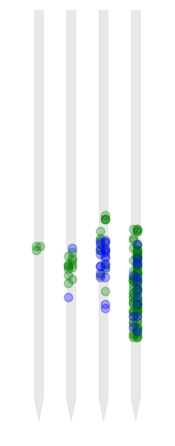

In [13]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 8), squeeze=False)
plot_NP2_probe(ax[0,0], sorting_analyzer_path='/Users/harryclark/Downloads/kilosort4_sa')
ax[0,0].scatter(ngs['probe_x'], ngs['probe_y'], color='green', alpha=0.3)
ax[0,0].scatter(gcs['probe_x'], gcs['probe_y'], color='blue', alpha=0.3)
plt.show()

pick 2 interesting grid cells to use 

In [23]:
reference_grid_cell_id1 = 194
reference_grid_cell_id2 = 160
reference_non_grid_cell_id3 = 411

In [15]:
tcs, tcs_time, _, last_ephys_bin, beh, clusters = compute_vr_tcs(mouse,day, apply_zscore=False, apply_guassian_filter=False)

last_ephys_time_bin = clusters[clusters.index[0]].count(bin_size=time_bs, time_units = 'ms').index[-1]

# time binned variables for later
ep = nap.IntervalSet(start=0, end=last_ephys_time_bin, time_units = 's')
speed_in_time = np.array(beh['S'].bin_average(bin_size=time_bs, time_units = 'ms', ep=ep))
dt_in_time = np.array(beh['travel'].bin_average(bin_size=time_bs, time_units = 'ms', ep=ep)-((beh['trial_number'][0]-1)*tl))
pos_in_time = dt_in_time%tl
trial_number_in_time = (dt_in_time//tl)+beh['trial_number'][0]

if np.any(np.isnan(pos_in_time)):
    series = pd.Series(dt_in_time)
    filled_series = series.ffill().bfill()
    dt_in_time = np.array(filled_series)
    pos_in_time = dt_in_time%tl
    trial_number_in_time = (dt_in_time//tl)+beh['trial_number'][0]

if np.any(np.isnan(speed_in_time)):
    series = pd.Series(speed_in_time)
    filled_series = series.ffill().bfill()
    speed_in_time = np.array(speed_in_time)

last_ephys_bin 14700
last_ephys_time_bin 1924.675


were going to use a history of 2000ms

were going to test to see if theres a relationship between the pseudo r2 value when you train on a grid cell to predict the firing of another grid cell and vice versa. 

...runnning cv-fold 0 of 10
pR2:  -0.0004562139061381476
...runnning cv-fold 1 of 10
pR2:  -0.0010420591235229537
...runnning cv-fold 2 of 10
pR2:  -0.0013928978301880335
...runnning cv-fold 3 of 10
pR2:  -0.006199686084920941
...runnning cv-fold 4 of 10
pR2:  -0.0010308455835068564
...runnning cv-fold 5 of 10
pR2:  -0.0018742921339978125
...runnning cv-fold 6 of 10
pR2:  -0.0008892977315344552
...runnning cv-fold 7 of 10
pR2:  -0.0002051655266508412
...runnning cv-fold 8 of 10
pR2:  -0.003799388747725674
...runnning cv-fold 9 of 10
pR2:  -0.0013568634955820613
pR2_cv: -0.001825 (+/- 0.000548)
...runnning cv-fold 0 of 10
pR2:  -0.05532913258228622
...runnning cv-fold 1 of 10
pR2:  -0.0466186355510565
...runnning cv-fold 2 of 10
pR2:  -0.04174356011342306
...runnning cv-fold 3 of 10
pR2:  -0.0782145008406443
...runnning cv-fold 4 of 10
pR2:  -0.02332144620442489
...runnning cv-fold 5 of 10
pR2:  0.0456351805395665
...runnning cv-fold 6 of 10
pR2:  -0.08243426409040056
...runnning cv-fol

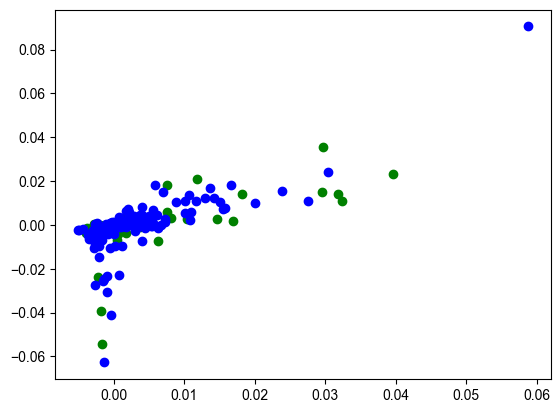

In [16]:
#reference_grid_cell_id1
ref = np.array(tcs_time[reference_grid_cell_id1])

vals1=[]
vals2=[]
for gc_id in gcs.cluster_id:
    alt = np.array(tcs_time[gc_id])
    if gc_id != reference_grid_cell_id1:
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                         window = time_bs, n_filters = 5, max_time = 2000)
        Y_hat, pR2_cv = xgb_history.fit_cv(alt, ref, verbose = 2, continuous_folds = True)
        vals1.append(np.nanmean(pR2_cv))
        Y_hat, pR2_cv = xgb_history.fit_cv(ref, alt, verbose = 2, continuous_folds = True)
        vals2.append(np.nanmean(pR2_cv))
plt.scatter(vals1,vals2, color='blue', alpha=0.3)

vals1=[]
vals2=[]
for ngs_id in ngs.cluster_id:
    alt = np.array(tcs_time[ngs_id])   
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                         window = time_bs, n_filters = 5, max_time = 2000)
    Y_hat, pR2_cv = xgb_history.fit_cv(alt, ref, verbose = 2, continuous_folds = True)
    vals1.append(np.nanmean(pR2_cv))
    Y_hat, pR2_cv = xgb_history.fit_cv(ref, alt, verbose = 2, continuous_folds = True)
    vals2.append(np.nanmean(pR2_cv))
plt.scatter(vals1,vals2, color='green', alpha=0.3)

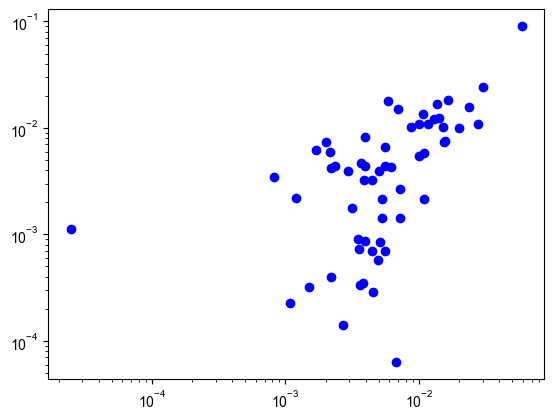

In [19]:
plt.scatter(vals1,vals2, color='blue')
plt.xscale('log')
plt.yscale('log')

done 1/36
done 2/36
done 3/36
done 5/36
done 6/36
done 7/36
done 8/36
done 9/36
done 10/36
done 11/36
done 12/36
done 13/36
done 14/36
done 15/36
done 16/36
done 17/36
done 18/36
done 19/36
done 20/36
done 21/36
done 22/36
done 23/36
done 24/36
done 25/36
done 26/36
done 27/36
done 28/36
done 29/36
done 30/36
done 31/36
done 32/36
done 33/36
done 34/36
done 35/36
done 36/36
done 0/126
done 1/126
done 2/126
done 3/126
done 4/126
done 5/126
done 6/126
done 7/126
done 8/126
done 9/126
done 10/126
done 11/126
done 12/126
done 13/126
done 14/126
done 15/126
done 16/126
done 17/126
done 18/126
done 19/126
done 20/126
done 21/126
done 22/126
done 23/126
done 24/126
done 25/126
done 26/126
done 27/126
done 28/126
done 29/126
done 30/126
done 31/126
done 32/126
done 33/126
done 34/126
done 35/126
done 36/126
done 37/126
done 38/126
done 39/126
done 40/126
done 41/126
done 42/126
done 43/126
done 44/126
done 45/126
done 46/126
done 47/126
done 48/126
done 49/126
done 50/126
done 51/126
done 52/1

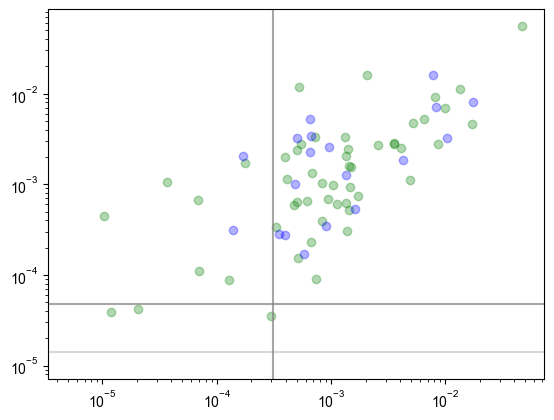

In [22]:
#reference_grid_cell_id1
ref = np.array(tcs_time[reference_grid_cell_id1])

gc_vals1=[]
gc_vals2=[]
for i, gc_id in enumerate(gcs.cluster_id):
    alt = np.array(tcs_time[gc_id])
    if gc_id != reference_grid_cell_id1:
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                         window = time_bs, n_filters = 5, max_time = 50)
        Y_hat, pR2_cv = xgb_history.fit_cv(alt, ref, verbose = 0, continuous_folds = True)
        gc_vals1.append(np.nanmean(pR2_cv))
        Y_hat, pR2_cv = xgb_history.fit_cv(ref, alt, verbose = 0, continuous_folds = True)
        gc_vals2.append(np.nanmean(pR2_cv))
        print(f'done {i+1}/{len(gcs)}')

ngs_vals1=[]
ngs_vals2=[]
for i, ngs_id in enumerate(ngs.cluster_id):
    alt = np.array(tcs_time[ngs_id])   
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                         window = time_bs, n_filters = 5, max_time = 50)
    Y_hat, pR2_cv = xgb_history.fit_cv(alt, ref, verbose = 0, continuous_folds = True)
    ngs_vals1.append(np.nanmean(pR2_cv))
    Y_hat, pR2_cv = xgb_history.fit_cv(ref, alt, verbose = 0, continuous_folds = True)
    ngs_vals2.append(np.nanmean(pR2_cv))
    print(f'done {i+1}/{len(ngs)}')


shuf_vals1=[]
shuf_vals2=[]
for i, gc_id in enumerate(gcs.cluster_id):
    alt = np.array(tcs_time[gc_id])
    np.random.shuffle(alt)
    if gc_id != reference_grid_cell_id1:
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                         window = time_bs, n_filters = 5, max_time = 50)
        Y_hat, pR2_cv = xgb_history.fit_cv(alt, ref, verbose = 0, continuous_folds = True)
        shuf_vals1.append(np.nanmean(pR2_cv))
        Y_hat, pR2_cv = xgb_history.fit_cv(ref, alt, verbose = 0, continuous_folds = True)
        shuf_vals2.append(np.nanmean(pR2_cv))
        print(f'done {i+1}/{len(gcs)}')

plt.scatter(shuf_vals1, shuf_vals2, color='grey', alpha=0.3)
plt.axvline(np.nanpercentile(shuf_vals1,95), color='grey', alpha=0.3)
plt.axvline(np.nanpercentile(shuf_vals1,99), color='grey', alpha=0.7)
plt.axhline(np.nanpercentile(shuf_vals2,95), color='grey', alpha=0.3)
plt.axhline(np.nanpercentile(shuf_vals2,99), color='grey', alpha=0.7)
plt.scatter(ngs_vals1, ngs_vals2, color='green', alpha=0.3)
plt.scatter(gc_vals1,  gc_vals2, color='blue', alpha=0.3)
plt.xscale('log')
plt.yscale('log')


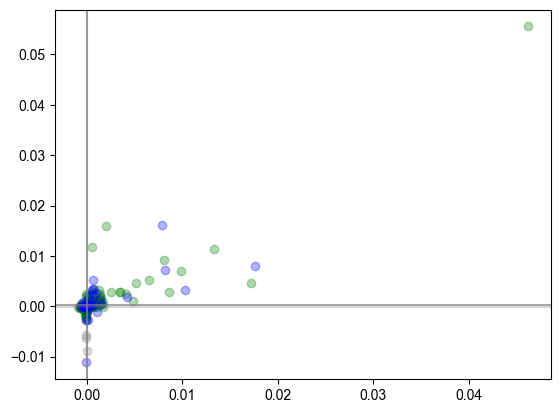

: 

In [ ]:

plt.scatter(shuf_vals1, shuf_vals2, color='grey', alpha=0.3)
plt.axvline(np.nanpercentile(shuf_vals1,95), color='grey', alpha=0.3)
plt.axvline(np.nanpercentile(shuf_vals1,99), color='grey', alpha=0.7)
plt.axhline(np.nanpercentile(shuf_vals2,95), color='grey', alpha=0.3)
plt.axhline(np.nanpercentile(shuf_vals2,99), color='grey', alpha=0.7)
plt.scatter(ngs_vals1, ngs_vals2, color='green', alpha=0.3)
plt.scatter(gc_vals1,  gc_vals2, color='blue', alpha=0.3)



In [28]:
#reference_grid_cell_id1
ref = np.array(tcs_time[reference_grid_cell_id1])

lh_gc_vals1=[]
lh_gc_vals2=[]
lh_gc_vals3=[]
for i, gc_id in enumerate(gcs.cluster_id):
    alt = np.array(tcs_time[gc_id])
    if gc_id != reference_grid_cell_id1:
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                         window = time_bs, n_filters = 5, max_time = 2000)
        Y_hat, pR2_cv = xgb_history.fit_cv(alt, ref, verbose = 0, continuous_folds = True)
        lh_gc_vals1.append(np.nanmean(pR2_cv))
        Y_hat, pR2_cv = xgb_history.fit_cv(ref, alt, verbose = 0, continuous_folds = True)
        lh_gc_vals2.append(np.nanmean(pR2_cv))
        dist = distance.euclidean([all[all['cluster_id'] == reference_grid_cell_id1].probe_x.iloc[0],  
                                   all[all['cluster_id'] == reference_grid_cell_id1].probe_y.iloc[0]],
                                   [all[all['cluster_id'] == gc_id].probe_x.iloc[0],  
                                   all[all['cluster_id'] == gc_id].probe_y.iloc[0]])
        lh_gc_vals3.append(dist)
        print(f'done {i+1}/{len(gcs)}')

lh_ngs_vals1=[]
lh_ngs_vals2=[]
lh_ngs_vals3=[]
for i, ngs_id in enumerate(ngs.cluster_id):
    alt = np.array(tcs_time[ngs_id])   
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                         window = time_bs, n_filters = 5, max_time = 2000)
    Y_hat, pR2_cv = xgb_history.fit_cv(alt, ref, verbose = 0, continuous_folds = True)
    lh_ngs_vals1.append(np.nanmean(pR2_cv))
    Y_hat, pR2_cv = xgb_history.fit_cv(ref, alt, verbose = 0, continuous_folds = True)
    lh_ngs_vals2.append(np.nanmean(pR2_cv))
    dist = distance.euclidean([all[all['cluster_id'] == reference_grid_cell_id1].probe_x.iloc[0],  
                                   all[all['cluster_id'] == reference_grid_cell_id1].probe_y.iloc[0]],
                                   [all[all['cluster_id'] == ngs_id].probe_x.iloc[0],  
                                   all[all['cluster_id'] == ngs_id].probe_y.iloc[0]])
    lh_ngs_vals3.append(dist)
    print(f'done {i+1}/{len(ngs)}')


lh_shuf_vals1=[]
lh_shuf_vals2=[]
for i, gc_id in enumerate(gcs.cluster_id):
    alt = np.array(tcs_time[gc_id])
    np.random.shuffle(alt)
    if gc_id != reference_grid_cell_id1:
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                         window = time_bs, n_filters = 5, max_time = 50)
        Y_hat, pR2_cv = xgb_history.fit_cv(alt, ref, verbose = 0, continuous_folds = True)
        lh_shuf_vals1.append(np.nanmean(pR2_cv))
        Y_hat, pR2_cv = xgb_history.fit_cv(ref, alt, verbose = 0, continuous_folds = True)
        lh_shuf_vals2.append(np.nanmean(pR2_cv))
        print(f'done {i+1}/{len(gcs)}')

done 1/36
done 2/36
done 3/36
done 4/36
done 5/36
done 6/36
done 7/36
done 8/36
done 9/36
done 10/36
done 11/36
done 12/36
done 14/36
done 15/36
done 16/36
done 17/36
done 18/36
done 19/36
done 20/36
done 21/36
done 22/36
done 23/36
done 24/36
done 25/36
done 26/36
done 27/36
done 28/36
done 29/36
done 30/36
done 31/36
done 32/36
done 33/36
done 34/36
done 35/36
done 36/36
done 1/126
done 2/126
done 3/126
done 4/126
done 5/126
done 6/126
done 7/126
done 8/126
done 9/126
done 10/126
done 11/126
done 12/126
done 13/126
done 14/126
done 15/126
done 16/126
done 17/126
done 18/126
done 19/126
done 20/126
done 21/126
done 22/126
done 23/126
done 24/126
done 25/126
done 26/126
done 27/126
done 28/126
done 29/126
done 30/126
done 31/126
done 32/126
done 33/126
done 34/126
done 35/126
done 36/126
done 37/126
done 38/126
done 39/126
done 40/126
done 41/126
done 42/126
done 43/126
done 44/126
done 45/126
done 46/126
done 47/126
done 48/126
done 49/126
done 50/126
done 51/126
done 52/126
done 53/1

Text(0, 0.5, 'pR2 - predict cell with ref GC')

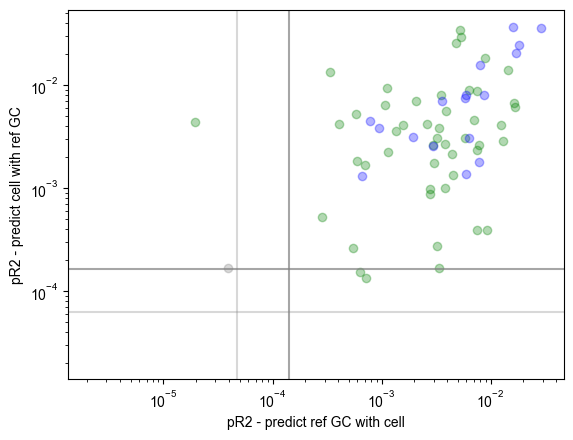

In [32]:

plt.scatter(lh_shuf_vals1, lh_shuf_vals2, color='grey', alpha=0.3)
plt.axvline(np.nanpercentile(lh_shuf_vals1,95), color='grey', alpha=0.3)
plt.axvline(np.nanpercentile(lh_shuf_vals1,99), color='grey', alpha=0.7)
plt.axhline(np.nanpercentile(lh_shuf_vals2,95), color='grey', alpha=0.3)
plt.axhline(np.nanpercentile(lh_shuf_vals2,99), color='grey', alpha=0.7)
plt.scatter(lh_ngs_vals1, lh_ngs_vals2, color='green', alpha=0.3)
plt.scatter(lh_gc_vals1,  lh_gc_vals2, color='blue', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('pR2 - predict ref GC with cell')
plt.ylabel('pR2 - predict cell with ref GC')



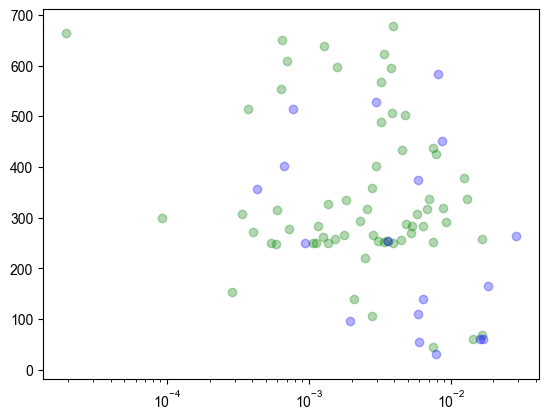

In [30]:
plt.scatter(lh_ngs_vals1, lh_ngs_vals3, color='green', alpha=0.3)
plt.scatter(lh_gc_vals1,  lh_gc_vals3, color='blue', alpha=0.3)
plt.xscale('log')


In [33]:
all

cluster_id                                    null_grid_score  \
0           20                                               None   
1           24                                               None   
2           26                                               None   
3           28                                               None   
4           29                                               None   
..         ...                                                ...   
206        464                                               None   
207        466                                               None   
208        467                                               None   
209        469                                               None   
210        472  [-0.7594745595557402, -0.10721477427952175, -0...   

                                       null_field_size  \
0                                                 None   
1                                                 None   
2                                                 None   
3                                                 None   
4                                                 None   
..                                                 ...   
206                                               None   
207                                               None   
208                                               None   
209                                               None   
210  [29.784854362302198, 38.419730747545614, 39.58...   

                                    null_field_spacing  \
0                                                 None   
1                                                 None   
2                                                 None   
3                                                 None   
4                                                 None   
..                                                 ...   
206                                               None   
207                                               None   
208                                               None   
209                                               None   
210  [39.713139149736264, 51.22630766339415, 52.778...   

                                      null_orientation  grid_score  \
0                                                 None    0.513866   
1                                                 None    0.369589   
2                                                 None    0.500508   
3                                                 None   -0.018266   
4                                                 None    0.340676   
..                                                 ...         ...   
206                                               None    0.073525   
207                                               None    0.482702   
208                                               None    0.132045   
209                                               None   -0.140408   
210  [6.732553201109386, 38.03100374797742, 2.47287...    0.131654   

     field_size  field_spacing  orientation    sig  travel brain_region  \
0     34.275489      45.700652    30.931968   True    25.0          PAR   
1     45.454475      60.605966    25.017390   True    42.0          PAR   
2     28.788051      38.384068    51.300245   True     7.0          PAR   
3     57.493726      76.658301     3.793184  False     1.0          PAR   
4     33.306566      44.408754    42.988823   True    21.0        ENTm1   
..          ...            ...          ...    ...     ...          ...   
206   32.224425      42.965900    29.605244  False     4.0        ENTm5   
207   29.419534      39.226046    31.734818   True    37.0        ENTm5   
208   46.640823      62.187764    49.474979  False    37.0        ENTm5   
209   66.319215      88.425620    35.869010  False    34.0        ENTm5   
210   38.373481      51.164642     3.583601  False     0.0        ENTm5   

       SC_x         SC_y         SC_z  

In [ ]:
gc_id1 = cluster_ids_by_group[0][9]
gc_id2 = cluster_ids_by_group[0][10]
distal_id = 316

y1 = np.array(tcs_time[gc_id1])
y2 = np.array(tcs_time[gc_id2])
y3 = np.array(tcs_time[distal_id])

X  = np.stack([pos_in_time, speed_in_time]).T
X1 = np.stack([pos_in_time, speed_in_time, y1]).T
X2 = np.stack([pos_in_time, speed_in_time, y2]).T

In [ ]:
time_bs

In [ ]:
xgb_history = MLencoding(tunemodel = 'xgboost',
                         cov_history = True, spike_history=True, # We can choose!
                         window = time_bs, #this dataset has 100ms time bins
                         n_filters = 5,
                         max_time = 1000)

Y_hat, pR2_cv = xgb_history.fit_cv(X, y1, verbose = 2, continuous_folds = True)

plot to see if the true time binned spikes aligns with the prediction of the model

In [ ]:
plt.scatter(y1, Y_hat, alpha=0.1)
plt.show()

plot the rate maps for true space binned, true time binned and predicted time binned data

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 2), squeeze=False)
plot_firing_rate_map(ax[0,0], zscore(tcs[gc_id1]), bs=bs, tl=tl, p=95)
plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 2), squeeze=False)
plot_firing_rate_map(ax[0,0], zscore(tcs[gc_id2]), bs=bs, tl=tl, p=95)
plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2, 2), squeeze=False)
plot_firing_rate_map(ax[0,0], zscore(tcs[distal_id]), bs=bs, tl=tl, p=95)
plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3, 3), squeeze=False)
plot_firing_rate_map(ax[0,0], zscore(tcs[16]), bs=bs, tl=tl, p=95)
plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(4, 2), squeeze=False)
tc, _ = np.histogram(dt_in_time, weights=y1, bins=last_ephys_bin, range=(0, bs*last_ephys_bin))
plot_firing_rate_map(ax[0,0], zscore(tc), bs=bs, tl=tl, p=95)
tc, _ = np.histogram(dt_in_time, weights=Y_hat, bins=last_ephys_bin, range=(0, bs*last_ephys_bin))
plot_firing_rate_map(ax[0,1], zscore(tc), bs=bs, tl=tl, p=95)
ax[0,0].set_title(f'actual')
ax[0,1].set_title(f'predicted')
plt.tight_layout()
plt.show()

we want to evaluate the effect of the history parameter. Here we will increase the number of time bins available to the sample
and plot this as a function of model performance

In [ ]:
nbins_history = np.append(np.append(np.array([5,6,7,8,9,10]), np.arange(10,100,20)), np.arange(100,501, 100))


In [ ]:
pR2s = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=True, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(X, y1, verbose = 0, continuous_folds = True)
    pR2s.append(np.nanmean(pR2_cv))
plt.plot(nbins_history, pR2s)
plt.xlabel('history length (bins)')
plt.ylabel('pseudo R2')
plt.show()

set the coviarate history to false and the spike history to true. This is only testing prediction using the cells own history

In [ ]:
pR2s = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = False, spike_history=True, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(X, y1, verbose = 0, continuous_folds = True)
    pR2s.append(np.nanmean(pR2_cv))
plt.plot(nbins_history, pR2s)
plt.xlabel('history length (bins)')
plt.ylabel('pseudo R2')
plt.show()

set the spike history to false and the cov history to true, this is now only using spike data from the other cell

In [ ]:
pR2s = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(y2, y1, verbose = 0, continuous_folds = True)
    pR2s.append(np.nanmean(pR2_cv))
plt.plot(nbins_history, pR2s)
plt.xlabel('history length (bins)')
plt.ylabel('pseudo R2')
plt.show()

set the spike history to false and the cov history to true, We will now look at the effect of using covariate history from a cell with a very distal connection (such as in the cerebellum)

In [ ]:
pR2s = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(y3, y1, verbose = 0, continuous_folds = True)
    pR2s.append(np.nanmean(pR2_cv))
plt.plot(nbins_history, pR2s)
plt.xlabel('history length (bins)')
plt.ylabel('pseudo R2')
plt.show()

It looks like for a number of different runs, providing a spike history of 40 time bins is optimal for model performance.

Now we're going to test model performance by dropping out n numbers of grid cells from a covariate history and see how the number of comodular grid cells improves the prediction of a held out grid cell.

In [ ]:
test_grid_cell = cluster_ids_by_group[0][9]
grid_module_population_cluster_id_minus_test_grid_cells = cluster_ids_by_group[0] 
grid_module_population_cluster_id_minus_test_grid_cells.remove(test_grid_cell)
x_grid_module = {cluster_id: tcs_time[cluster_id] for cluster_id in grid_module_population_cluster_id_minus_test_grid_cells if cluster_id in tcs_time}

all_x = np.vstack(list(x_grid_module.values())).T
y = np.array(tcs_time[test_grid_cell])

In [ ]:
n_neurons = np.arange(1, all_x.shape[1]+1, 2)
iterations = 3
ntime_bins = 5
nfilters = 5
pR2s = np.zeros((len(n_neurons), iterations))
pR2s_shuff = np.zeros((len(n_neurons), iterations))

for n in n_neurons:
    print(f'I am going to use only {n} grid cells')
    reps = []
    for i in range(iterations):
        # real data
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = nfilters, max_time = 2000)
        np.random.seed(i)
        idx = np.random.choice(n_neurons-1, n, replace=False)
        x = all_x[:, idx]
        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2s[n-1, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv = {np.nanmean(pR2_cv)}')

        # shuffle data
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = nfilters, max_time = 2000)
        nx = x.T.copy()
        for r, xROW in enumerate(x.T):
            np.random.shuffle(xROW)
            nx[r]=xROW
        x = nx.T

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2s_shuff[n-1, i] = np.nanmean(pR2_cv)
        print(f'pR2_cv_shuff = {np.nanmean(pR2_cv)}')
      

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(2,2))

ax.plot(n_neurons, np.nanmean(pR2s, axis=1), color='red', label='real')
ax.fill_between(n_neurons, 
         np.nanmean(pR2s, axis=1)+stats.sem(pR2s, axis=1, nan_policy='omit'),
         np.nanmean(pR2s, axis=1)-stats.sem(pR2s, axis=1, nan_policy='omit'),color='red', alpha=0.3)
ax.plot(n_neurons, np.nanmean(pR2s_shuff, axis=1), color='grey', label='shuffle')
ax.fill_between(n_neurons, 
         np.nanmean(pR2s_shuff, axis=1)+stats.sem(pR2s_shuff, axis=1, nan_policy='omit'),
         np.nanmean(pR2s_shuff, axis=1)-stats.sem(pR2s_shuff, axis=1, nan_policy='omit'),color='grey', alpha=0.3)
ax.set_ylabel(f'pseudo R2')
ax.set_xlabel(f'n neurons')
ax.legend()
plt.show()

we can clear see that any number of grid cells can beat the shuffle, but there is slowing of the plateau at around 5 grid cells

what happens if we try to predict the activity of a cell with the history of another cell, and do this for all combinations within a session?
We can sorted the clusters by ML position in this session because we are recording across all the shanks. 

First we will only use 50ms of history (5 time bins of 10 ms each). 

Then we will use 2 seconds of history (200 time bins of 10 ms each).

We'll take an example grid cell from above and test the predictabliltity against all other cells first before running every combination

In [ ]:
y = np.array(tcs_time[gc_id2])[:5000]

all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

nfilters = 5
pR2s_short_history = np.zeros(len(all))
pR2s_long_history = np.zeros(len(all))

done = 0
n_to_finish = len(all)

for i, id_i in enumerate(all.cluster_id):
    x = np.array(tcs_time[id_i])[:5000]

    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                                window = time_bs, n_filters = nfilters, max_time = 50)
    Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
    pR2s_short_history[i] = np.nanmean(pR2_cv)
    
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                                window = time_bs, n_filters = nfilters, max_time = 2000)
    Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
    pR2s_long_history[i] = np.nanmean(pR2_cv)
    
    done+= 1
    print(f'completed {done}/{n_to_finish}')

plt.plot(pR2s_short_history, label='50ms history')
plt.plot(pR2s_long_history, label='2000ms history')
plt.legend()
plt.show()    

In [ ]:
plt.scatter(all.SC_x, all.SC_y)

In [ ]:
all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

cap = True
nfilters = 5
pR2s = np.zeros((len(all), 4))

done = 0
n_to_finish = len(all)*4

for i, id_i in enumerate(all.cluster_id):
    for j, (left, right) in enumerate(zip([-3800, -3500, -3300, -3100], [-3600, -3400,-3100, -2900])):
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                                 window = time_bs, n_filters = nfilters, max_time = 50)
        y = np.array(tcs_time[id_i])

        valid_cluster_ids = all[(all['SC_x'] > left) & 
                                (all['SC_x'] < right) & 
                                (all['cluster_id'] != id_i)]
        tcs_to_use = {cluster_id: tcs_time[cluster_id] for cluster_id in valid_cluster_ids.cluster_id.values if cluster_id in tcs_time}
        x = np.vstack(list(tcs_to_use.values())).T
        
        if cap:
            x = x[:5000,:]
            y = y[:5000]

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2s[i, j] = np.nanmean(pR2_cv)

        done+= 1
        print(f'completed {done}/{n_to_finish}')


In [ ]:
all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

cap = True
nfilters = 5
pR2slh = np.zeros((len(all), 4))

done = 0
n_to_finish = len(all)*4

for i, id_i in enumerate(all.cluster_id):
    for j, (left, right) in enumerate(zip([-3800, -3500, -3300, -3100], [-3600, -3400,-3100, -2900])):
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                                 window = time_bs, n_filters = nfilters, max_time = 2000)
        y = np.array(tcs_time[id_i])

        valid_cluster_ids = all[(all['SC_x'] > left) & 
                                (all['SC_x'] < right) & 
                                (all['cluster_id'] != id_i)]
        tcs_to_use = {cluster_id: tcs_time[cluster_id] for cluster_id in valid_cluster_ids.cluster_id.values if cluster_id in tcs_time}
        x = np.vstack(list(tcs_to_use.values())).T
        
        if cap:
            x = x[:5000,:]
            y = y[:5000]

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2slh[i, j] = np.nanmean(pR2_cv)

        done+= 1
        print(f'completed {done}/{n_to_finish}')


In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(3,2),sharey=True)

x = np.arange(1, len(pR2slh)+1)
y = np.arange(0, len(pR2slh[0]))
X, Y = np.meshgrid(x, y)
heatmap = ax[0].pcolormesh(Y, X, pR2s.T, shading='auto', cmap='viridis', vmin=0, vmax=0.4)
heatmap.set_rasterized(True)
ax[0].set_ylabel(f'Tested on neuron')
ax[0].set_xlabel(f'Trained on shank')
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels([1,2,3,4])
ax[0].invert_yaxis()
ax[0].set_title('50ms cov history')

heatmap = ax[1].pcolormesh(Y, X, pR2slh.T, shading='auto', cmap='viridis', vmin=0,vmax=0.4)
heatmap.set_rasterized(True)
ax[1].set_xlabel(f'Trained on shank')
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels([1,2,3,4])
ax[1].set_title('2s cov history')
plt.show()   

In [ ]:
all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

cap = True
nfilters = 5
pR2s_spike_and_covariate_history = np.zeros((len(all), 4))

done = 0
n_to_finish = len(all)*4

for i, id_i in enumerate(all.cluster_id):
    for j, (left, right) in enumerate(zip([-3800, -3500, -3300, -3100], [-3600, -3400,-3100, -2900])):
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=True, 
                                 window = time_bs, n_filters = nfilters, max_time = 50)
        y = np.array(tcs_time[id_i])

        valid_cluster_ids = all[(all['SC_x'] > left) & 
                                (all['SC_x'] < right) & 
                                (all['cluster_id'] != id_i)]
        tcs_to_use = {cluster_id: tcs_time[cluster_id] for cluster_id in valid_cluster_ids.cluster_id.values if cluster_id in tcs_time}
        x = np.vstack(list(tcs_to_use.values())).T
        
        if cap:
            x = x[:5000, :]
            y = y[:5000]

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2s_spike_and_covariate_history[i, j] = np.nanmean(pR2_cv)
        done+= 1
        print(f'completed {done}/{n_to_finish}')


In [ ]:
all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

cap = True
nfilters = 5
pR2s_spike_history = np.zeros((len(all), 4))

done = 0
n_to_finish = len(all)*4

for i, id_i in enumerate(all.cluster_id):
    for j, (left, right) in enumerate(zip([-3800, -3500, -3300, -3100], [-3600, -3400,-3100, -2900])):
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = False, spike_history=True, 
                                 window = time_bs, n_filters = nfilters, max_time = 50)
        y = np.array(tcs_time[id_i])

        valid_cluster_ids = all[(all['SC_x'] > left) & 
                                (all['SC_x'] < right) & 
                                (all['cluster_id'] != id_i)]
        tcs_to_use = {cluster_id: tcs_time[cluster_id] for cluster_id in valid_cluster_ids.cluster_id.values if cluster_id in tcs_time}
        x = np.vstack(list(tcs_to_use.values())).T
        
        if cap:
            x = x[:5000,:]
            y = y[:5000]

        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2s_spike_history[i, j] = np.nanmean(pR2_cv)
        done+= 1
        print(f'completed {done}/{n_to_finish}')


In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(5,2),sharey=True)

x = np.arange(1, len(pR2slh)+1)
y = np.arange(0, len(pR2slh[0]))
X, Y = np.meshgrid(x, y)
heatmap = ax[0].pcolormesh(Y, X, pR2s_spike_history.T, shading='auto', cmap='viridis', vmin=0, vmax=0.3)
heatmap.set_rasterized(True)
ax[0].set_ylabel(f'Tested on neuron')
ax[0].set_xlabel(f'Trained on S')
ax[0].set_xticks([0,1,2,3])
ax[0].set_xticklabels([1,2,3,4])
ax[0].invert_yaxis()
ax[0].set_title('sp history')

heatmap = ax[1].pcolormesh(Y, X, pR2s_spike_and_covariate_history.T, shading='auto', cmap='viridis', vmin=0, vmax=0.3)
heatmap.set_rasterized(True)
ax[1].set_xlabel(f'Trained on S')
ax[1].set_xticks([0,1,2,3])
ax[1].set_xticklabels([1,2,3,4])
ax[1].set_title('sp&cov history')

heatmap = ax[2].pcolormesh(Y, X, pR2s.T, shading='auto', cmap='viridis', vmin=0, vmax=0.3)
heatmap.set_rasterized(True)
ax[2].set_xlabel(f'Trained on S')
ax[2].set_xticks([0,1,2,3])
ax[2].set_xticklabels([1,2,3,4])
ax[2].set_title('cov history')


heatmap = ax[3].pcolormesh(Y, X, pR2s_spike_and_covariate_history.T-pR2s_spike_history.T, shading='auto', cmap='coolwarm', vmin=-0.1, vmax=0.1)
heatmap.set_rasterized(True)
ax[3].set_xlabel(f'Trained on S')
ax[3].set_xticks([0,1,2,3])
ax[3].set_xticklabels([1,2,3,4])
ax[3].set_title('spcov minus sp')

plt.show()   

In [ ]:
all = all.sort_values(by=['SC_x'], ascending=[False])


In [ ]:
plt.imshow(pR2s, cmap='viridis', vmin=0, vmax=0.2)
plt.colorbar()
plt.show()    

In [ ]:
all = all.sort_values(by=['SC_x', 'SC_y'], ascending=[False, False])

nfilters = 5
pR2s = np.zeros((len(all), len(all)))

done = 0
n_to_finish = len(all)*len(all)

for i, id_i in enumerate(all.cluster_id):
    for j, id_j in enumerate(all.cluster_id):
        xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                                 window = time_bs, n_filters = nfilters, max_time = 2000)
        x = np.array(tcs_time[id_i][:50000])
        y = np.array(tcs_time[id_j][:50000])
        Y_hat, pR2_cv = xgb_history.fit_cv(x, y, verbose = 0, continuous_folds = True)
        pR2s[i, j] = np.nanmean(pR2_cv)

        done+= 1
        print(f'completed {done}/{n_to_finish}')

plt.imshow(pR2s, cmap='viridis')
plt.colorbar()
plt.show()    

In [ ]:
from hyperopt import fmin, hp, Trials, tpe, STATUS_OK

# Makes sure these are in model.params, otherwise you'll get a key error
space4rf = {
    'silent': 1,
    'learning_rate': hp.choice('learning_rate', [0.01, 0.05, 0.1, 0.2, 0.3]),
    'min_child_weight': hp.choice('min_child_weight', [1, 2, 5, 10]),
    'n_estimators': hp.choice('n_estimators', [100, 300, 500, 700, 1000]),
    'subsample': hp.choice('subsample', [0.5, 0.6, 0.7, 0.8, 1.0]),
    'max_depth': hp.choice('max_depth', [3, 5, 7, 9]),
    'gamma': hp.choice('gamma', [0, 0.1, 0.3, 0.5, 1.0]),
}

#object that holds iteration results
trials = Trials()

#define model
xgb_history = MLencoding(tunemodel = 'xgboost',
                         cov_history = False, spike_history=True, # We can choose!
                         window = time_bs, #this dataset has 50ms time bins
                         n_filters = 5,
                         max_time = int(time_bs*10))

#function to minimize
def fnc(params):
    print(params)

    # make sure parameters are integers that need to be. 
    params['silent'] = int(params['silent'])
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_child_weight'] = int(params['min_child_weight'])

    xgb_history.set_params(params)
    
    # Remember that X and y have been defined above.
    Y_hat, PR2s = xgb_history.fit_cv(X,y, n_cv = 5, verbose = 0, continuous_folds = True)

    # return negative since hyperopt always minimizes the function
    return -np.mean(PR2s)

hyperoptBest = fmin(fnc, space4rf, algo=tpe.suggest, max_evals=500, 
                    trials=trials, return_argmin=False)


In [ ]:
hyperoptBest